In [1]:
# Import necessary libraries
from mtcnn import MTCNN
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# Define input and output directories

# Directory containing input images
input_dir = Path("photo/images")  
# Directory to save images with detected face rectangles
output_dir_mtcnn = Path("face_detected_MTCNN")  
# Directory to save cropped face images
cropped_dir_mtcnn = Path("cropped_face_MTCNN")  

# Create output directories if they don't exist
output_dir_mtcnn.mkdir(parents=True, exist_ok=True)
cropped_dir_mtcnn.mkdir(parents=True, exist_ok=True)

In [3]:
# Initialize the MTCNN face detector
detector = MTCNN()

# List to store paths of images where no face was detected
no_faces_detected_mtcnn = []

In [4]:
# def detect_faces_mtcnn(img_path):
#     img = cv2.cvtColor(cv2.imread(str(img_path)), cv2.COLOR_BGR2RGB)
#     results = detector.detect_faces(img)

#     for idx, res in enumerate(results, start=1):
#         x, y, width, height = res['box']
#         cv2.rectangle(img, (x, y), (x+width, y+height), (255, 0, 0), 2)

#         # Crop and save each face
#         face_crop = img[y:y+height, x:x+width]
#         crop_name = f"{img_path.stem}_face_{idx}.jpg"
#         face_bgr = cv2.cvtColor(face_crop, cv2.COLOR_RGB2BGR)
#         cv2.imwrite(str(cropped_dir_mtcnn / crop_name), face_bgr)

#     # Save image with rectangles
#     img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
#     output_path = output_dir_mtcnn / img_path.name
#     cv2.imwrite(str(output_path), img_bgr)

#     print(f"{img_path.name}: {len(results)} face(s) detected and cropped (MTCNN).")

# Function to detect and process faces using MTCNN
def detect_faces_mtcnn(img_path):
    """
    Detects faces in an image using the MTCNN model.
    
    Parameters:
    - img_path: Path to the image to process.
    """
    # Load the image and convert it to RGB (MTCNN works on RGB images)
    img = cv2.cvtColor(cv2.imread(str(img_path)), cv2.COLOR_BGR2RGB)
    # Perform face detection
    results = detector.detect_faces(img)

    # If no faces are detected, record the image path
    if len(results) == 0:
        no_faces_detected_mtcnn.append(img_path)
    else:
        # Iterate over each detected face
        for idx, res in enumerate(results, start=1):
            x, y, width, height = res['box']  # Coordinates of the face bounding box
            # Draw a rectangle around the detected face
            cv2.rectangle(img, (x, y), (x+width, y+height), (255, 0, 0), 2)

            # Crop the face region from the image
            face_crop = img[y:y+height, x:x+width]
            crop_name = f"{img_path.stem}_face_{idx}.jpg"

            # Convert the cropped face back to BGR for saving
            face_bgr = cv2.cvtColor(face_crop, cv2.COLOR_RGB2BGR)
            cv2.imwrite(str(cropped_dir_mtcnn / crop_name), face_bgr)

    # Convert the processed image back to BGR before saving (OpenCV saves in BGR format)
    img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    cv2.imwrite(str(output_dir_mtcnn / img_path.name), img_bgr)
    # Print the number of faces detected
    print(f"MTCNN processed: {img_path.name}, faces detected: {len(results)}")

In [5]:
# Initialize counter and set maximum number of images to process
image_counter = 0
max_images = 25

In [6]:
# Iterate through each subfolder in the input directory
for folder in input_dir.iterdir():
    if not folder.is_dir():
        continue
    for img_path in folder.glob("*.jpg"):
        if image_counter >= max_images:
            break
        # Detect faces in the current image
        detect_faces_mtcnn(img_path)
        image_counter += 1
    if image_counter >= max_images:
        break

# for folder in input_dir.iterdir():
#     if not folder.is_dir():
#         continue
#     for img_path in folder.glob("*.jpg"):
#         detect_faces_mtcnn(img_path)


MTCNN processed: 00.jpg, faces detected: 1
MTCNN processed: 01.jpg, faces detected: 1
MTCNN processed: 02.jpg, faces detected: 0
MTCNN processed: 03.jpg, faces detected: 0
MTCNN processed: 04.jpg, faces detected: 1
MTCNN processed: 05.jpg, faces detected: 2
MTCNN processed: 06.jpg, faces detected: 2
MTCNN processed: 07.jpg, faces detected: 2
MTCNN processed: 08.jpg, faces detected: 1
MTCNN processed: 09.jpg, faces detected: 2
MTCNN processed: 10.jpg, faces detected: 0
MTCNN processed: 11.jpg, faces detected: 1
MTCNN processed: 12.jpg, faces detected: 1
MTCNN processed: 13.jpg, faces detected: 2
MTCNN processed: 14.jpg, faces detected: 2
MTCNN processed: 15.jpg, faces detected: 2
MTCNN processed: 16.jpg, faces detected: 1
MTCNN processed: 17.jpg, faces detected: 1
MTCNN processed: 18.jpg, faces detected: 2
MTCNN processed: 19.jpg, faces detected: 2
MTCNN processed: 20.jpg, faces detected: 2
MTCNN processed: 21.jpg, faces detected: 2
MTCNN processed: 22.jpg, faces detected: 2
MTCNN proce


Total images without faces detected (MTCNN): 3


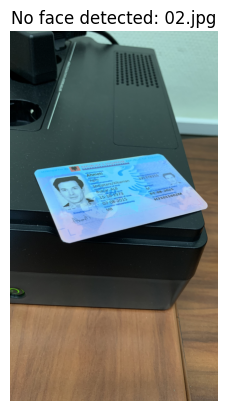

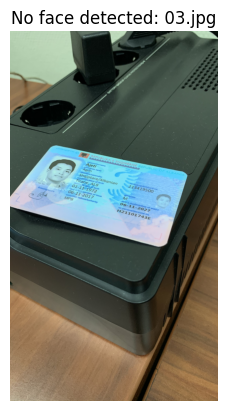

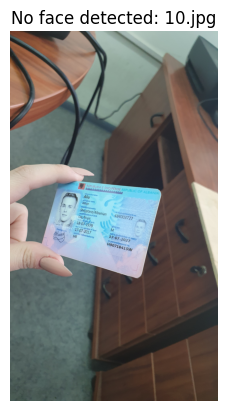

In [7]:
# Report total number of images where no faces were detected
print(f"\nTotal images without faces detected (MTCNN): {len(no_faces_detected_mtcnn)}")

# Display the first 5 images where no face was detected
for img_path in no_faces_detected_mtcnn[:5]:
    img = cv2.cvtColor(cv2.imread(str(img_path)), cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(f"No face detected: {img_path.name}")
    plt.axis('off')
    plt.show()